In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges , errors = "coerce")
df.TotalCharges.isnull().sum()

11

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df2 = df.iloc[:,1:]

In [12]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df2["Churn"].replace(to_replace = "Yes" , value = 1, inplace =True)
df2["Churn"].replace(to_replace = "No" , value = 0, inplace =True)

In [14]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


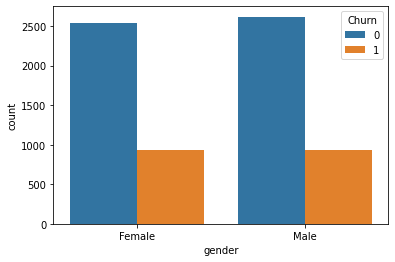

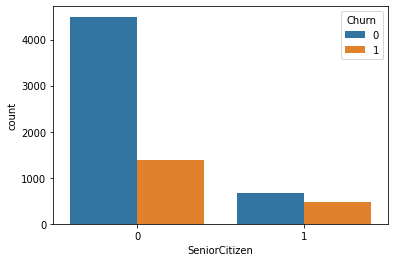

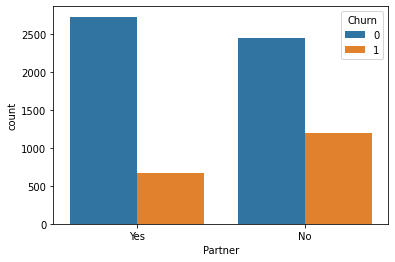

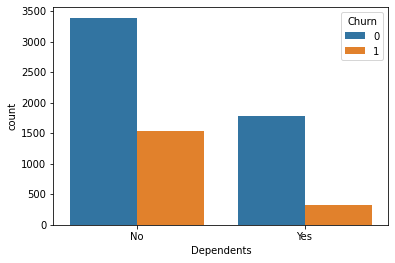

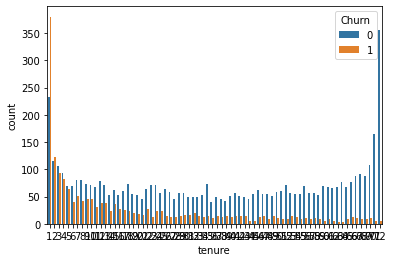

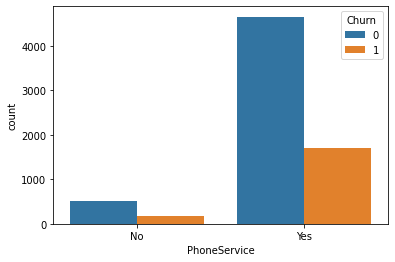

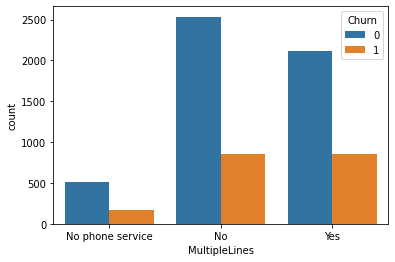

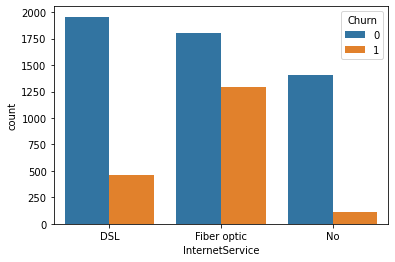

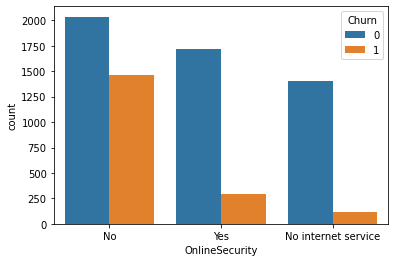

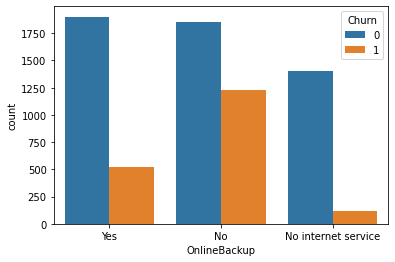

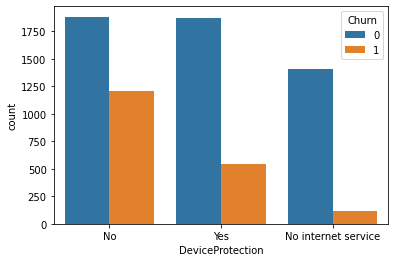

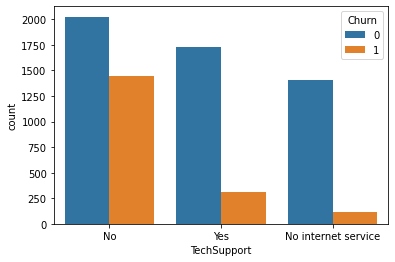

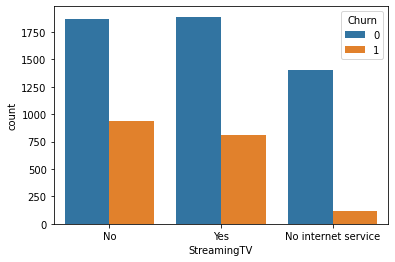

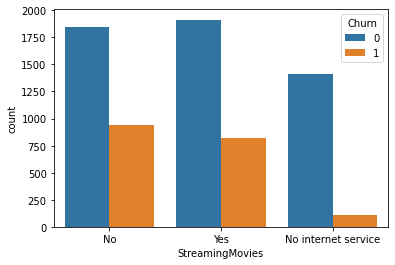

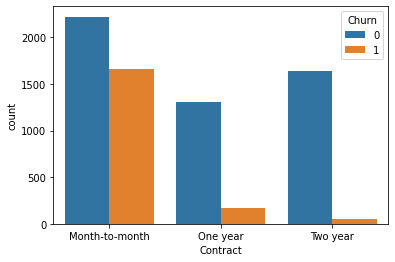

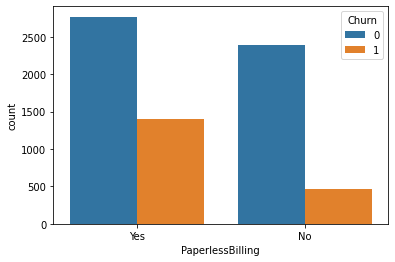

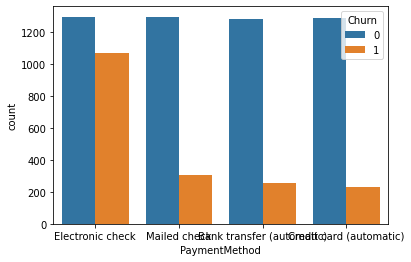

In [15]:
#univariant analysis
for i , predictor in enumerate(df2.drop(columns = ['MonthlyCharges','TotalCharges',"Churn"])):
    plt.figure(i)
    sns.countplot(data = df2 , x = predictor, hue = 'Churn')

In [16]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [17]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [2]:
for i in df:
    if [i == object]:
        df = i

NameError: name 'df' is not defined

<AxesSubplot:>

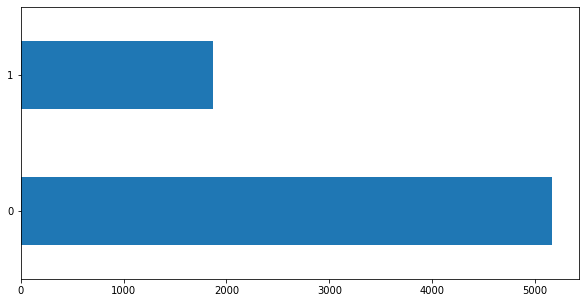

In [18]:
#plotting a graph of value count
df_dummies['Churn'].value_counts().plot(kind = "barh", figsize = (10,5))

In [19]:
#finding exact no of values of yes and no churners
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [20]:
#finding count in ratio
100*df_dummies['Churn'].value_counts()/len(df_dummies["Churn"])

0    73.421502
1    26.578498
Name: Churn, dtype: float64

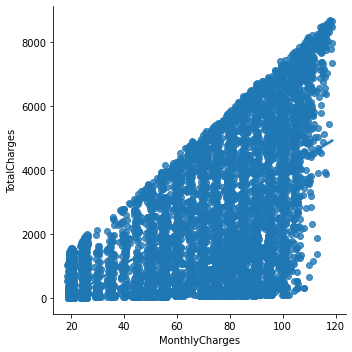

In [21]:
#relation between monthly and total
sns.lmplot(data = df_dummies,x='MonthlyCharges',y='TotalCharges')

Text(0.5, 0, 'monthly charges')

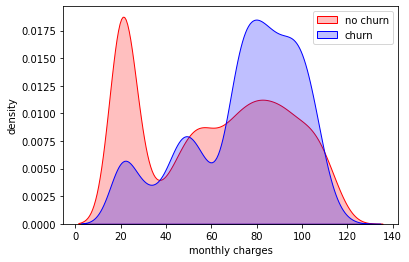

In [22]:
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] ==0)]
                  , color = 'red' , shade = True)
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] ==1)]
                  ,ax =mth, color = 'blue' , shade = True)
mth.legend(["no churn","churn"] , loc = "upper right")
mth.set_ylabel("density")
mth.set_xlabel("monthly charges")

Text(0.5, 1.0, 'Total charges by churn')

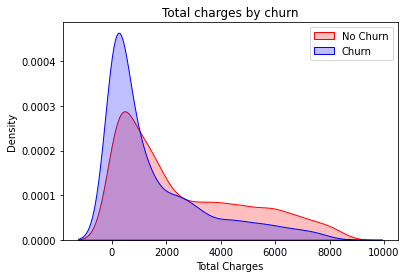

In [23]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<AxesSubplot:>

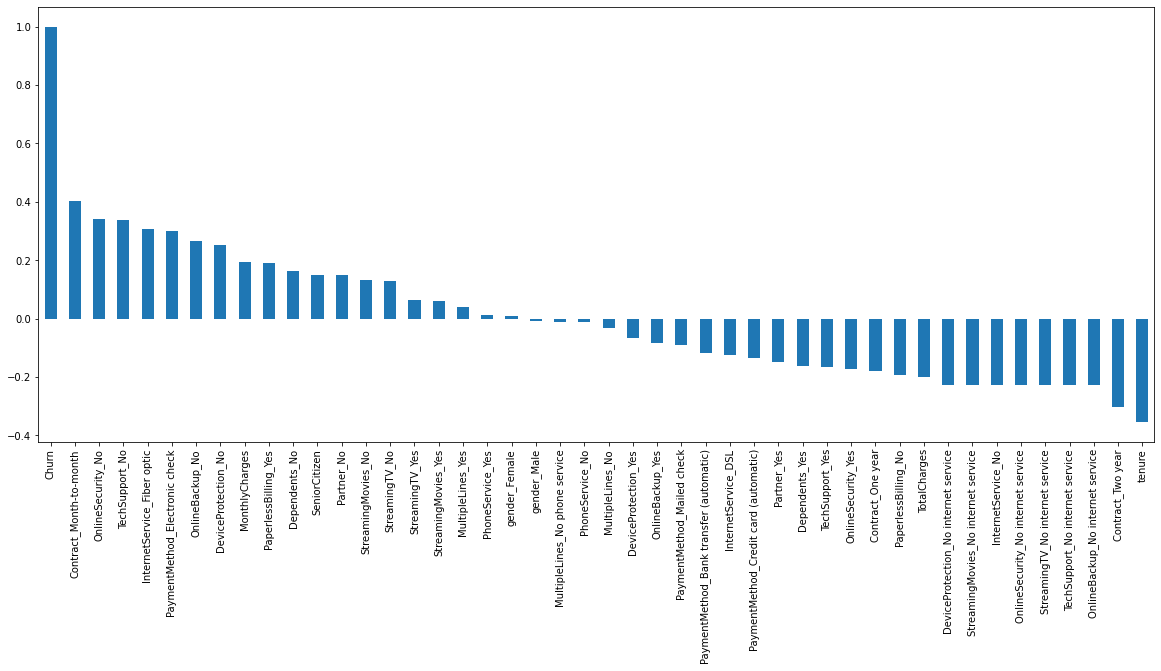

In [24]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

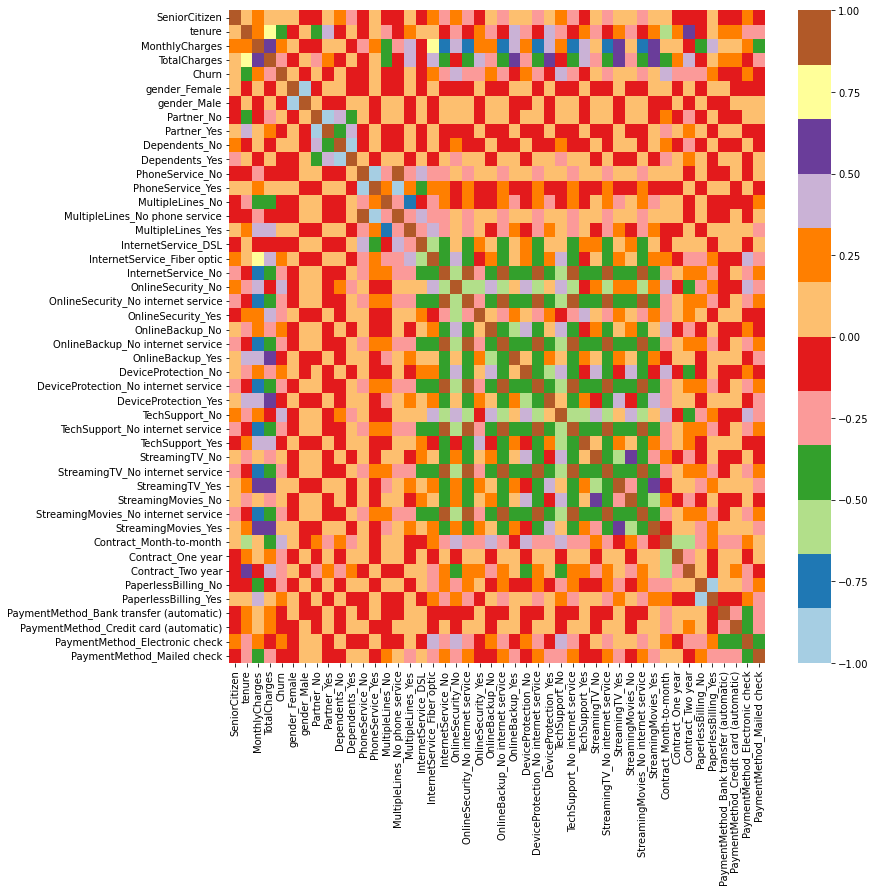

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

In [26]:
x = df_dummies.drop("Churn", axis = 1)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [27]:
y = df_dummies["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [28]:
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler = scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

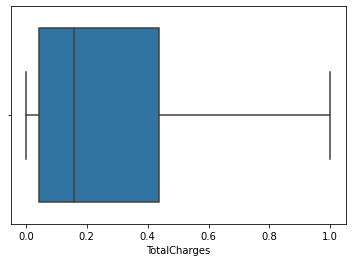

In [29]:
sns.boxplot(x['TotalCharges'])

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

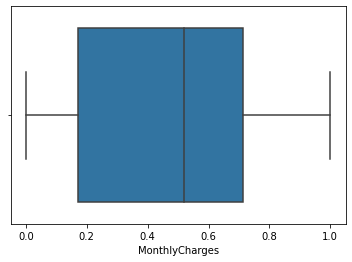

In [30]:
sns.boxplot(x['MonthlyCharges'])

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

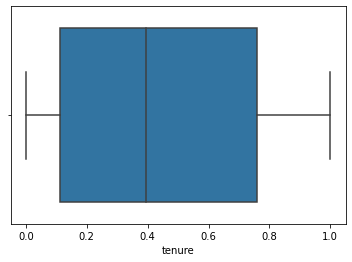

In [31]:
sns.boxplot(x['tenure'])

In [32]:
#creating a model
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [33]:
#logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =100)
result = classifier.fit(x_train , y_train)

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
prediction_test = classifier.predict(x_test)

In [36]:
prediction_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
#accuracy of the model for testing
print(metrics.accuracy_score(y_test , prediction_test))

0.7867803837953091


In [38]:
#accuracy of the model for training
prediction_train = classifier.predict(x_train)

In [39]:
print(metrics.accuracy_score(y_train , prediction_train))

0.8087111111111112


In [40]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1028
           1       0.63      0.52      0.57       379

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [41]:
print(classification_report(y_train,prediction_train))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4135
           1       0.67      0.56      0.61      1490

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625



In [42]:
from imblearn.combine import SMOTEENN

In [43]:
#removing overfitting imbalanced dataset
sm = SMOTEENN()
x_resampled , y_resampled = sm.fit_resample(x,y)


In [44]:
xr_train , xr_test , yr_train , yr_test = train_test_split(x_resampled,y_resampled , test_size = 0.2 )
xr_train.shape , xr_test.shape

((4852, 45), (1213, 45))

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
result = model.fit(xr_train , yr_train)

In [47]:
predictionr_test = model.predict(xr_test)

In [48]:
predictionr_test

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(yr_test , predictionr_test))

0.8985985160758451


In [50]:
predictionr_train = model.predict(xr_train)

In [51]:
print(metrics.accuracy_score(yr_train , predictionr_train))

0.9058120362737015


In [52]:
#hyperparamter tunning
param_grid = {
    'penalty': ['l1','l2','elasticnet', 'none'],
    'solver': ['newton_cg','lbfgs','liblinear','sag','saga']
}

In [53]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = model , param_grid = param_grid , cv = 5 ,verbose = True  )

In [72]:
grid_search.fit(xr_train,yr_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER-PC\AppData\Local\Pro

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [75]:
final_model_lr = grid_search.best_estimator_
final_model_lr

LogisticRegression(penalty='none')

In [76]:
model_lr_smote1 = LogisticRegression(penalty ='none')
model_lr_smote1.fit(xr_train , yr_train)
model_score_train = model_lr_smote1.score(xr_train , yr_train)
print(model_score_train)

0.9074608408903545


In [83]:
yr_predict_train = model_lr_smote1.predict(xr_train)

In [81]:
yr_predict = model_lr_smote1.predict(xr_test)
model_score_r1 = model_lr_smote1.score(xr_test,yr_test)
print(model_score_r1)

0.8977741137675186


In [82]:
print(metrics.classification_report(yr_test,yr_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       530
           1       0.91      0.90      0.91       683

    accuracy                           0.90      1213
   macro avg       0.90      0.90      0.90      1213
weighted avg       0.90      0.90      0.90      1213



In [85]:
print(metrics.classification_report(yr_train,yr_predict_train))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2163
           1       0.92      0.92      0.92      2689

    accuracy                           0.91      4852
   macro avg       0.91      0.91      0.91      4852
weighted avg       0.91      0.91      0.91      4852



In [54]:
#decision tree model

In [86]:
model = DecisionTreeClassifier(random_state =100)

In [87]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [88]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [89]:
#accuracy of the testing model
print(metrics.accuracy_score(y_test,y_pred))

0.7114427860696517


In [90]:
#accuracy for the training model
x_pred = model.predict(x_train)
x_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
print(metrics.accuracy_score(y_train,x_pred))

0.9975111111111111


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1028
           1       0.47      0.51      0.49       379

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407



In [93]:
xr_train , xr_test , yr_train , yr_test = train_test_split(x_resampled,y_resampled , test_size = 0.2 )
xr_train.shape , xr_test.shape

((4852, 45), (1213, 45))

In [94]:
model_dt_smote = DecisionTreeClassifier()
model_dt_smote.fit(xr_train , yr_train)

DecisionTreeClassifier()

In [95]:
mode_score_train = model_dt_smote.score(xr_train,yr_train)
print(model_score_train)

0.9074608408903545


In [96]:
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test,yr_test)
print(model_score_r)

0.9497114591920858


In [97]:
print(metrics.classification_report(yr_test,yr_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       549
           1       0.95      0.96      0.95       664

    accuracy                           0.95      1213
   macro avg       0.95      0.95      0.95      1213
weighted avg       0.95      0.95      0.95      1213



In [98]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[513  36]
 [ 25 639]]


In [99]:
param_grid = {
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha':[0.1,.01,.001],
    'max_depth':[5,6,7,8,9],
    'criterion':['gini','entropy']
}

In [100]:
grid_search = GridSearchCV(estimator = model_dt_smote , param_grid = param_grid ,cv=5 ,verbose =True)

In [102]:
grid_search.fit(xr_train,yr_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecate

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [103]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt')

In [105]:
#now creating decision tree models with these paramters
model_dt_smote1 = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt')

In [106]:
model_dt_smote1.fit(xr_train , yr_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt')

In [108]:
yr_predict= (model_dt_smote1.predict(xr_test))
model_score_r1 = model_dt_smote1.score(xr_test,yr_test)
print(model_score_r1)

0.9117889530090684


In [109]:
print(metrics.classification_report(yr_test,yr_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       549
           1       0.93      0.91      0.92       664

    accuracy                           0.91      1213
   macro avg       0.91      0.91      0.91      1213
weighted avg       0.91      0.91      0.91      1213



In [110]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[503  46]
 [ 61 603]]


In [101]:
#knn model

In [111]:
knn= KNeighborsClassifier(n_neighbors = 1)

In [112]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [113]:
y1_pred = knn.predict(x_test)
y1_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [114]:
#accuracy for the testing
print(metrics.accuracy_score(y_test,y1_pred))

0.7142857142857143


In [115]:
#accuracy for the training
x1_pred = knn.predict(x_train)
x1_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [116]:
print(metrics.accuracy_score(y_train,x1_pred))

0.9971555555555556


In [117]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1028
           1       0.47      0.50      0.48       379

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407



In [70]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

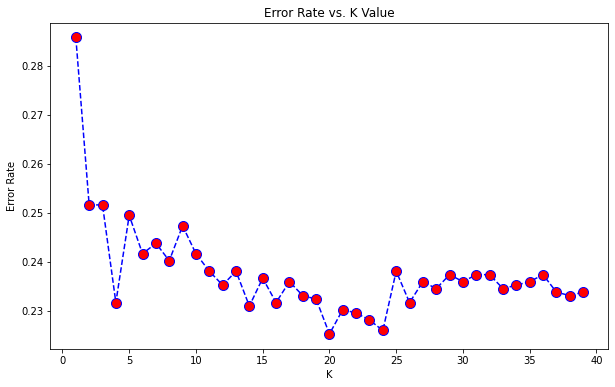

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [118]:
#fitting on sampled data /balanced data
knn.fit(xr_train,yr_train)


KNeighborsClassifier(n_neighbors=1)

In [120]:
pred = knn.predict(xr_test)

In [121]:
print(metrics.classification_report(yr_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       549
           1       0.96      0.99      0.98       664

    accuracy                           0.98      1213
   macro avg       0.98      0.97      0.98      1213
weighted avg       0.98      0.98      0.98      1213



In [122]:
print(metrics.confusion_matrix(yr_test,pred))

[[525  24]
 [  5 659]]


In [123]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xr_train,yr_train)
    pred_i = knn.predict(xr_test)
    error_rate.append(np.mean(pred_i != yr_test))

Text(0, 0.5, 'Error Rate')

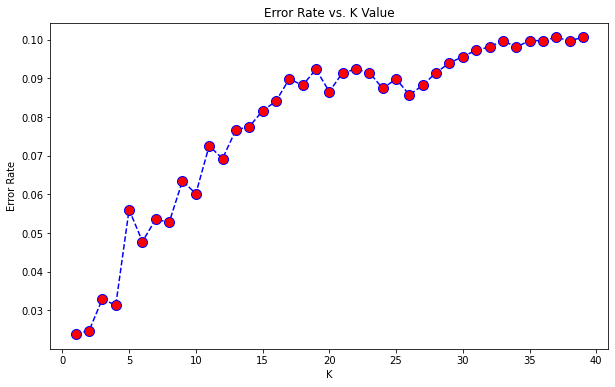

In [124]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [126]:
#svc
from sklearn.svm import SVC

In [128]:
model.svm = SVC(kernel = 'linear')
model.svm.fit(xr_train,yr_train)
preds = model.svm.predict(xr_test)
metrics.accuracy_score(yr_test,preds)

0.9084913437757626

In [132]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(yr_test,preds))

[[495  54]
 [ 57 607]]


In [134]:
import pickle

In [136]:
#finally pricking the best model
#create an iterator object with write permission -model.pkl
with open('project_1_pkl','wb')as files:
    pickle.dump(knn,files)